In [1]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier  #분류
# from sklearn.neighbors import KNeighborsRegressor  #예측
from sklearn.linear_model import LinearRegression  #선형회귀
from sklearn.preprocessing import PolynomialFeatures  #다항특성을 만들어주는 라이브러리

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import random
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= '10'  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

##### 데이터 피처 설명
- pclass : Passenger Class, 승객 등급
- survived : 생존 여부 : target 값이 됨.
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 탑승 한 형제/배우자 수
- parch : 탑승 한 부모/자녀 수
- ticket : 티켓 번호
- fare : 승객 지불 요금
- cabin : 선실 이름
- embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
- body : 사망자 확인 번호 - 분석과정에서 제외해야 함. 머신러닝에 100% 영향을 미침.
- home.dest : 고향/목적지

In [7]:
#타이타닉의 생존자 분류 모델을 구현하시오.
#target: survived
#data: 그외
#분류: knn, logistric, RandomForest
df_train=pd.read_csv('../z20_data/titanic_train.csv')
df_train.head(3)
df_test=pd.read_csv('../z20_data/titanic_test.csv')
df_test.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,NaN,NaN
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S,NaN,"Ilfracombe, Devon"
2,2,0,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S,NaN,London


In [12]:
df_train.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [9]:
#데이터 중 name,tick,cabin,body,home,dest
df_train = df_train.drop(['name','ticket','cabin','body','home.dest'],axis=1)
df_train
df_test=df_test[['pclass','survived','sex','age','sibsp','parch','fare','embarked']]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.00,0,1,19.5000,S
1,2,1,female,4.00,1,1,23.0000,S
2,2,1,female,30.00,1,0,13.8583,C
3,3,0,male,NaN,0,0,7.7250,Q
4,3,1,female,22.00,0,0,7.7250,Q
...,...,...,...,...,...,...,...,...
911,3,1,female,0.17,1,2,20.5750,S
912,3,0,male,NaN,0,0,8.0500,S
913,3,1,female,NaN,0,0,7.7333,Q
914,2,1,female,20.00,0,0,36.7500,S


<Axes: xlabel='survived'>

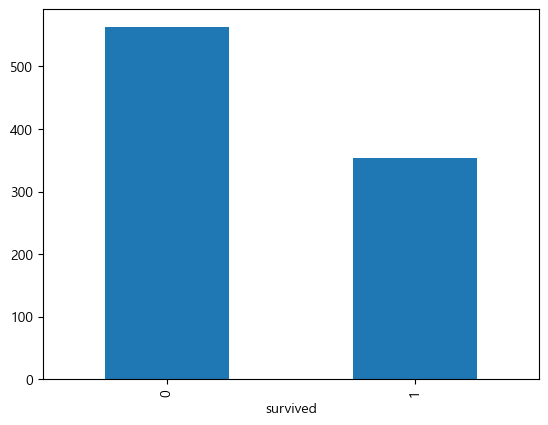

In [15]:
#bar그래프
df_train['survived'].value_counts().plot.bar()

In [18]:
#생존자의 pclass별 인원 
df_train[df_train['survived']==1].count()
df_train[df_train['survived']==1]['pclass'].value_counts()

pclass
1    142
3    129
2     82
Name: count, dtype: int64

In [19]:
df_train[df_train['survived']==0]['pclass'].value_counts()


pclass
3    369
2    106
1     88
Name: count, dtype: int64

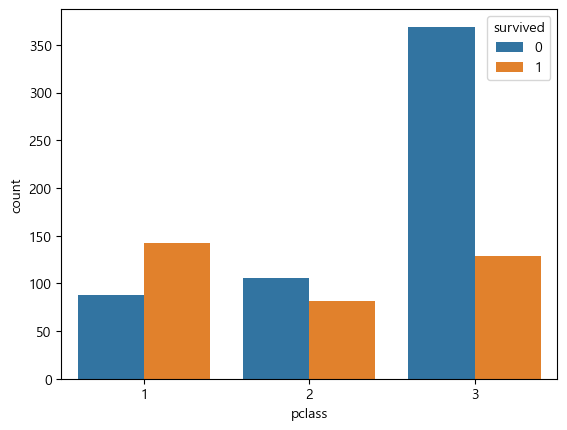

In [20]:
# 피처간의 관련성 부분을 확인
# 생존과 등급의 관계
# pclass: Passaenger Class,승객등급

import seaborn as sns
df_train['pclass'].value_counts()

#sns.countplot 승객등급별 생존여부 2가지 컬럼을 가지고 그래프 비교
#pclass의 분류로 survived별 데이터 표시
ax = sns.countplot(x='pclass', hue='survived',data=df_train)

In [63]:
# T-test
from scipy import stats

# 함수생성 - 데이터,컬럼이름
def valid_features(df,col_name): # df_train['age']>0],age - 741, age
    
    # 그래프 출력 
    g = sns.FacetGrid(df, col='survived') # age컬럼 데이터로 분류해서 survived 그래프 출력
    g.map(plt.hist, col_name, bins=30) 
    # 히스토그램 그래프 출력 - x축이 age, y축은 생존자,사망자 명
    
    
    # 생존자데이터
    titanic_survived = df[df['survived']==1]  #생존자데이터 306
    titanic_survived_static = np.array(titanic_survived[col_name]) # 생존자데이터 나의 컬럼
    # 표준편차
    print("data 생존자 std : ",'%.2f'%np.std(titanic_survived_static)) # 생존자데이터의 표준편차 출력
    
    # 사망자데이터
    titanic_n_survived = df[df['survived']==0]  # 사망자 435
    titanic_n_survived_static = np.array(titanic_n_survived[col_name]) # 생존자데이터 나의 컬럼
    # 표준편차
    print("data 사망자 std : ",'%.2f'%np.std(titanic_n_survived_static)) # 생존자데이터의 표준편차 출력
    
    # -------------------
    # T-test로 두집단의 평균 차이를 검정
    # T-test 0.05보다 작거나 큰것을 가지고 판단
    tTestResult = stats.ttest_ind(titanic_survived[col_name],titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name],titanic_n_survived[col_name],equal_var=False)
    print("p-value assuming equal : %.3f and %.3f" % tTestResult)
    print("p-value not assuming equal : %.3f and %.3f" % tTestResultDiffVar)

In [29]:
d=df_train[df_train['age']>0]
d[d['survived']==1]['age']

0      13.00
1       4.00
2      30.00
4      22.00
6      30.00
       ...  
903    50.00
905    50.00
907    31.00
911     0.17
914    20.00
Name: age, Length: 306, dtype: float64

In [ ]:
#나이와 생존의 두 집단의 관계 검정
#df_train[df_train['age']>0] - age값이 들어있는 전체 데이터, age컬럼명
# g=sns.FaceGrid()    #Nan은 제외



data 생존자 std :  0.64
data 사망자 std :  1.34
p-value assuming equal : -2.118 and 0.034
p-value not assuming equal : -2.446 and 0.015


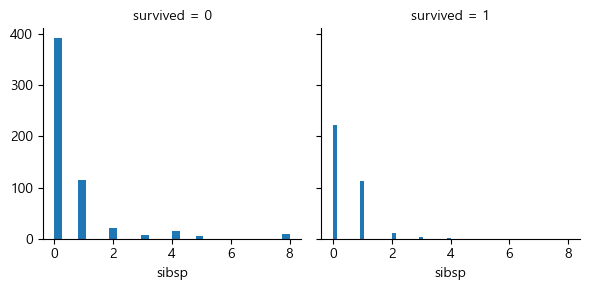

In [64]:
#sibsp feature
#sibsp: 탑승한 형제/배우자 수 
valid_features(df_train,'sibsp')

data 생존자 std :  14.22
data 사망자 std :  13.71
p-value assuming equal : -0.546 and 0.585
p-value not assuming equal : -0.543 and 0.587


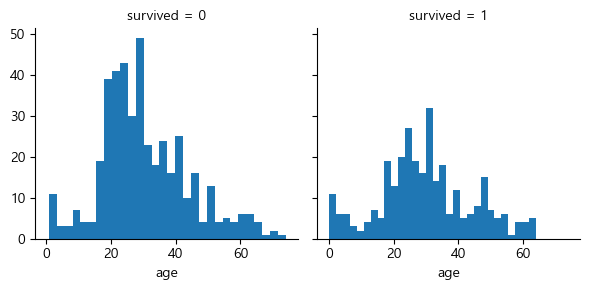

In [65]:
valid_features(df_train[df_train['age']>0],'age')


In [48]:
#데이터 확인
#성별 확인
df_train['sex'].value_counts()

sex
male      581
female    335
Name: count, dtype: int64

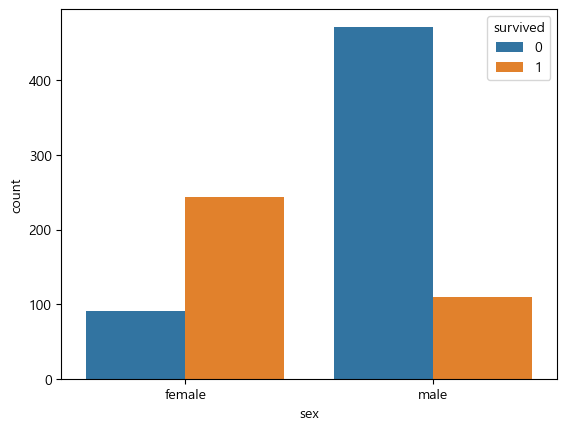

In [50]:
#두 피처간 분포 그래프 countplot
ax=sns.countplot(x='sex',hue='survived', data=df_train)

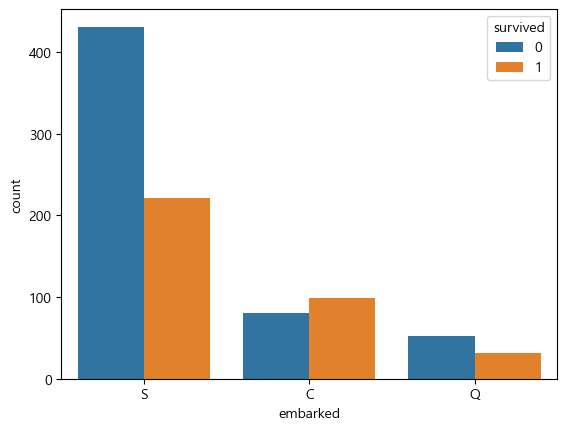

In [55]:
#embarked : 3개의 승선항 (C Q S )
df_train['embarked'].value_counts()
ax= sns.countplot(x='embarked',hue='survived', data=df_train)

In [52]:
df_train.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

data 생존자 std :  60.68
data 사망자 std :  33.65
p-value assuming equal : 7.523 and 0.000
p-value not assuming equal : 6.657 and 0.000


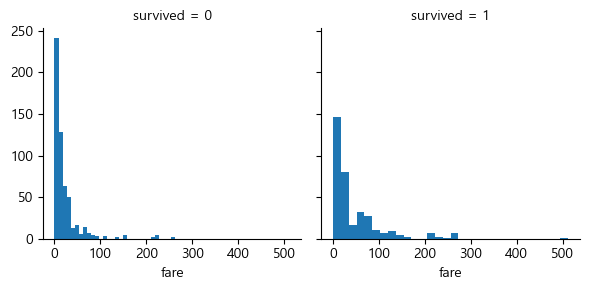

In [66]:
# fare:승객 지불 요금
valid_features(df_train,'fare')

In [76]:
#데이터 전처리
#age 데이터의 평균값으로 nan 데이터를 처리

#결측치에 넣을 평균값- train,test 셋트에 모두 적용
replace_mean=df_train[df_train['age']>0]['age'].mean()
df_train['age']=df_train['age'].fillna(replace_mean)
df_test['age']=df_test['age'].fillna(replace_mean)

#embark: 결측값-데이터 2개
embarked_mode=df_train['embarked'].value_counts().index[0]
df_train['embarked']=df_train['embarked'].fillna(embarked_mode)
df_test['embarked']=df_test['embarked'].fillna(embarked_mode)


In [75]:
df_train['embarked'].value_counts().index[0]     #C
df_train['embarked'].value_counts().values[0]     #652


652

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       916 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
 7   embarked  916 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.4+ KB


In [69]:
#nan값을 제외한 age의 평균값
replace_mean=df_train[df_train['age']>0]['age'].mean()
df_train['age']=df_train['age'].fillna(replace_mean)

train,test 세트 합치기


In [78]:
whole_df=pd.concat([df_train,df_test])


In [79]:
#원핫 인코딩을 한 후,train,test세트를 분리 -
train_idx_num = len(df_train)
train_idx_num

916

In [81]:
#원핫 인코딩
whole_df_encoded=pd.get_dummies(whole_df)
whole_df_encoded

,pclass,survived,age,sibsp,parch,fare,body,sex_female,sex_male,embarked_C,...,"home.dest_Warwick, England","home.dest_Washington, DC","home.dest_West Hampstead, London / Neepawa, MB","home.dest_West Haven, CT","home.dest_West Hoboken, NJ","home.dest_Wiltshire, England Niagara Falls, NY","home.dest_Winnipeg, MB","home.dest_Woodford County, KY","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland"
0,2,1,13.000000,0,1,19.5000,NaN,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,4.000000,1,1,23.0000,NaN,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1,30.000000,1,0,13.8583,NaN,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,3,0,30.231444,0,0,7.7250,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1,22.000000,0,0,7.7250,NaN,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,3,0,33.000000,0,0,7.8542,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,False
389,2,1,31.000000,0,0,21.0000,NaN,True,False,False,...,False,False,False,False,False,False,False,False,False,False
390,3,1,30.231444,0,0,7.7500,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,False
391,3,0,30.231444,0,0,7.7500,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
len(whole_df_encoded)

1309

In [96]:
#train, test세트 분리 -survived 빼고 다 가져오기
# 916개 

train_input=whole_df_encoded.iloc[:train_idx_num,whole_df_encoded.columns != 'survived']
train_input
# df_w= df_w.iloc[:train_idx_num]
test_input
train_target=whole_df_encoded['survived'][(train_idx)num:]
test_target.count()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2533984474.py, line 8)

In [ ]:
#표준화 작업
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled= ss.trainsform(train_input)
test_scaled=ss.trasform(test_input)

In [ ]:
from sklearn.model_selection import LogisticRegression


In [ ]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))


In [ ]:
#경사하강법
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log_loss',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)

In [ ]:
classes = np.unique(train_target)
classes

In [ ]:
train_score=[]
test_score=[]
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target)

In [ ]:
#검증세트 - cross_validate
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import cross_validate
splitter=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
scores= cross_

confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confmat=confusion_matrix(y_true=test_target, y_pred=predict)
confmat

In [ ]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

#n_jobs :core 전부 사용
rf= RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

scores=cross_validate(rf,train_input,train_target,return_train_score=true,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))